# Dataset Visualisation SemEval Task 4
Hyperpartisan News detection

##### Ignore the warning below

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Tune maxlimit because... we have LOTS of data
mpl.rcParams['agg.path.chunksize'] = 100000
mpl.rcParams['savefig.dpi'] = 1000

df = pd.read_csv('output/consolidated.csv')

In [7]:
print(df.describe(),'\n')
print(df.columns)

          articleId  content_length    title_length  hyperpartisan  \
count  1.000000e+06  1000000.000000  1000000.000000      1000000.0   
mean   7.724636e+05     4611.406966       59.475444            0.5   
std    4.289178e+05     7079.726960       58.501440            0.5   
min    1.000000e+00       28.000000        0.000000            0.0   
25%    3.952780e+05     1578.000000       39.000000            0.0   
50%    8.189150e+05     3002.000000       54.000000            0.5   
75%    1.137630e+06     5356.000000       68.000000            1.0   
max    1.494892e+06   718864.000000    13338.000000            1.0   

          orientation  
count  1000000.000000  
mean        -0.303740  
std          7.473908  
min        -10.000000  
25%         -6.250000  
50%          0.000000  
75%          6.250000  
max         10.000000   

Index(['articleId', 'content_length', 'title_length', 'article_date',
       'hyperpartisan', 'orientation'],
      dtype='object')


### Remove None Dates

In [8]:
date_less = df[df['article_date']!='None']
# print(date_less.info())

date_less = date_less[(date_less['article_date']!='0201-04-10') & (date_less['article_date']!='0200-01-02')]
date_less['article_date'] = pd.to_datetime(date_less['article_date'], format='%Y-%m-%d')
date_less.head()

,articleId,content_length,title_length,article_date,hyperpartisan,orientation
0,1,1868,121,2017-09-10,1,10
1,2,1498,69,2017-05-05,1,10
2,8,1831,62,2017-11-15,0,5
3,9,8524,53,2015-06-10,0,0
5,12,2908,50,2016-09-26,1,10


#### Plot 

Not so interesting plots of date vs length of articles.

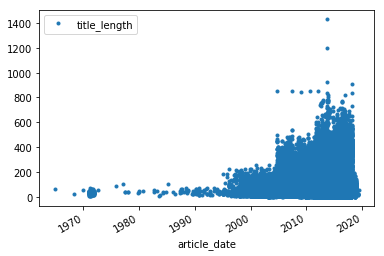

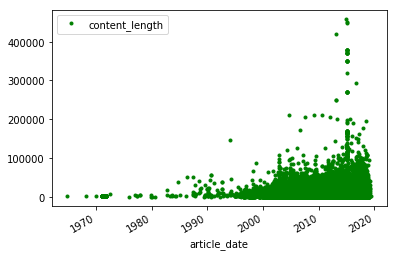

In [9]:
date_less.plot('article_date', 'title_length', style='.')
plt.savefig('figures/date_vs_title_len.png')
date_less.plot('article_date', 'content_length', c='g', style='.')
plt.savefig('figures/date_vs_content_len.png')

Some more plots, depicting ground truth.

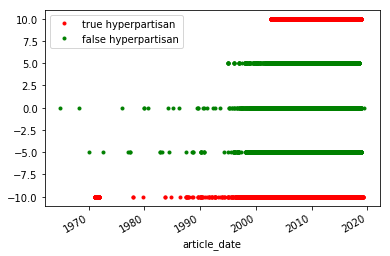

In [10]:
hyper_part = date_less[date_less['hyperpartisan']==1]
normal = date_less[date_less['hyperpartisan']==0]
ax = hyper_part.plot('article_date', 'orientation', c='r', style='.')
normal.plot('article_date', 'orientation', c='g', ax=ax, style='.')
ax.legend(['true hyperpartisan', 'false hyperpartisan'])
plt.savefig('figures/date_vs_orientation.png')